NIYOJITA ARUN RAJE
PGP DS DEC 2020 Cohort 1
PROJECT 2-California Housing Price Prediction .

In [ ]:
#Importing labarires and setting directory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()
os.chdir("G:\Simplilearn\Data Science with Python\Project")

In [3]:
#1. Loading the data 
house=pd.read_excel('1553768847_housing.xlsx')
#Printing first few rows
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [ ]:
#2 Handling missing values

In [4]:
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [5]:
house.total_bedrooms[house.total_bedrooms.isna()].shape

(207,)

In [6]:
round(np.mean(house.total_bedrooms))

538

In [7]:
#Fill the missing values with the mean of the respective column.
house["total_bedrooms"] = np.where(house.total_bedrooms.isna(), house.total_bedrooms.mean(), house.total_bedrooms)

In [8]:
house.total_bedrooms[house.total_bedrooms.isna()].shape

(0,)

In [9]:
#Extract input (X) and output (Y) data from the dataset.
x=house.iloc[:,0:9]
y=house['median_house_value']

In [10]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [11]:
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [ ]:
#3. Encode categorical data :

In [12]:
#creating dummy variables
house_dummy=pd.get_dummies(data=house,columns=['ocean_proximity'],drop_first=True)

In [13]:
house_dummy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1,0,0,0


In [ ]:
#Extract input (X) and output (Y) data from the dataset(after handling categorical data).

In [14]:
x1=house_dummy[
['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population'
                ,'households','median_income','ocean_proximity_INLAND','ocean_proximity_INLAND'
                ,'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']]

In [15]:
x1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,1,0


In [16]:
y1=house_dummy['median_house_value']

In [17]:
y1.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [18]:
#4.Split the dataset : 
#Split the data into 80% training dataset and 20% test dataset.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=0,test_size=.20)

In [19]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12069,-117.55,33.83,6,502,76.0,228,65,4.2386,1,1,0,0
15925,-122.44,37.73,52,2381,492.0,1485,447,4.3898,0,0,1,0
11162,-118.00,33.83,26,1718,385.0,1022,368,3.9333,0,0,0,0
4904,-118.26,34.01,38,697,208.0,749,206,1.4653,0,0,0,0
4683,-118.36,34.08,52,2373,601.0,1135,576,3.1765,0,0,0,0


In [20]:
#5. Standardize data :
#Standardize training and test datasets.

from sklearn.preprocessing import StandardScaler

In [21]:
stdS=StandardScaler()

In [22]:
stdS.fit(x_train)

StandardScaler()

In [23]:
x_train_std=stdS.transform(x_train)

In [66]:
x_train_std

array([[ 1.00389865, -0.8400624 , -1.79507596, ...,  1.46934754,
        -0.35239609, -0.38649771],
       [-1.43477229,  0.98536392,  1.85553889, ..., -0.68057418,
         2.83771591, -0.38649771],
       [ 0.77948108, -0.8400624 , -0.20785212, ..., -0.68057418,
        -0.35239609, -0.38649771],
       ...,
       [-1.1654712 ,  0.44709718,  0.18895385, ..., -0.68057418,
        -0.35239609,  2.58733744],
       [ 0.81439048, -0.93835459,  0.42703742, ..., -0.68057418,
        -0.35239609, -0.38649771],
       [ 1.99632302, -1.32216217, -1.08082523, ...,  1.46934754,
        -0.35239609, -0.38649771]])

In [24]:
x_test_std=stdS.transform(x_test) 

In [25]:
x_test_std

array([[ 1.2532515 , -1.42513494, -0.52529688, ..., -0.68057418,
        -0.35239609,  2.58733744],
       [ 0.79444225, -0.79793718,  0.26831504, ..., -0.68057418,
        -0.35239609, -0.38649771],
       [-1.13554886,  1.41597731,  0.03023146, ...,  1.46934754,
        -0.35239609, -0.38649771],
       ...,
       [-0.67673961,  1.51426949, -1.39827   , ...,  1.46934754,
        -0.35239609, -0.38649771],
       [-1.19040649,  1.09301727, -0.84274165, ...,  1.46934754,
        -0.35239609, -0.38649771],
       [ 0.67973993, -0.70432557,  1.85553889, ..., -0.68057418,
        -0.35239609, -0.38649771]])

In [ ]:
#6.Perform Linear Regression 
#6.a Perform Linear Regression on training data.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model=LinearRegression()

In [28]:
model.fit(x_train_std,y_train)

LinearRegression()

In [29]:
print (x_train_std.shape, y_train.shape)
print (x_test_std.shape, y_test.shape)

(16512, 12) (16512,)
(4128, 12) (4128,)


In [30]:
model.score(x_train_std,y_train)

0.6468185794135339

In [31]:
model.score(x_test_std,y_test)

0.6373558206436005

In [32]:
model.coef_

array([-54082.63710739, -54752.53371938,  13546.97453986,  -9323.14998266,
        28513.51631968, -44249.96428518,  29708.23139638,  73860.47020829,
        -8966.82678763,  -8966.82678763,  -1381.01666948,   1834.22476069])

In [57]:
model.intercept_

207249.8958938948

In [33]:
#6.b Predict output for test data
predictor=model.predict(x_test_std)
predictor

array([216556.23578765, 287477.72807046, 179441.59070368, ...,
        88996.8246252 , 255334.88612346, 213389.32243391])

In [ ]:
#6.c Print root mean square error(RMSE)

In [61]:
#Method 1
from sklearn.metrics import mean_squared_error
mse=np.sqrt(mean_squared_error(y_test,predictor))
mse

68765.66406773779

In [56]:
#Method 2
np.mean((model.predict(x_test_std)-y_test) **2)

4728716554.676972

In [36]:
#varaince of model
model.score(x_test_std,y_test)

0.6373558206436005

In [92]:
#7. Perform Linear Regression with one independent variable

In [37]:
#7.a Extract just the median_income column from the independent variables (from X_train and X_test).
X_train_median_income=x_train_std[:,[7]]
X_test_median_income=x_test_std[:,[7]]

In [45]:
print(X_train_median_income.shape,X_test_median_income.shape,y_train.shape,y_test.shape)

(16512, 1) (4128, 1) (16512,) (4128,)


In [46]:
#7. b Perform Linear Regression to predict housing values based on median_income.
from sklearn.linear_model import LinearRegression
model2=LinearRegression()

In [47]:
model2.fit(X_train_median_income,y_train)

LinearRegression()

In [48]:
#7.c Predict output for test dataset
predictor2=model2.predict(X_test_median_income)

In [100]:
#7.d Plot the fitted model for training data as well as test data

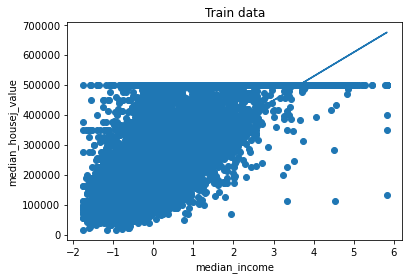

In [52]:
plt.scatter(X_train_median_income,y_train)
plt.plot(X_train_median_income,model2.predict(X_train_median_income))
plt.title('Train data')
plt.xlabel('median_income')
plt.ylabel('median_housej_value')
plt.show()

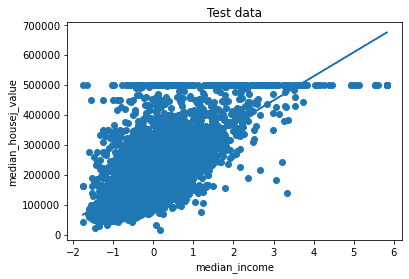

In [62]:
plt.scatter(X_test_median_income,y_test)
plt.plot(X_test_median_income,model2.predict(X_test_median_income))
plt.title('Test data')
plt.xlabel('median_income')
plt.ylabel('median_housej_value')
plt.show()